![teks alternatif](https://drive.google.com/uc?id=1IXpcB3npQHTVFIcaC84dW-EHAOPJxCcG)

#COVID-19 UNIVARIATE TIME SERIES FORECASTING USING TENSOR FLOW

##1. Dataset

Data on this project are time series data on the number of COVID-19 patients in Indonesia, both positive confirmed data, died and cured. Data obtained from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data#.

Fitur Data: 
1. Country
2. Province
3. Confirmed
4. Death
5. Recovered

The amount of data:
66

Date Data Taken:
29 March 2020

##2. Framing & Hypothesis
###Framing
In this project we are trying to form a time series model to model the growth of COVID-19 data in Indonesia. Then predictions are made to help the government understand the spread or growth of COVID-19 in Indonesia. 
###Hypothesis
Using time series data, we can build a model based on past data and then predict tomorrow's data.
###ML Type
Single Value Forecasting

##3. Modeling
###A. Data Preparation

In [0]:
#Activating the Library needed in modeling
from numpy import array
from matplotlib import pyplot as plt
import pandas as pd 
import tensorflow as tf
import io
import numpy as np
from google.colab import files

In [147]:
#Import Data
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving time_series_covid_19_recovered.csv to time_series_covid_19_recovered.csv
User uploaded file "time_series_covid_19_recovered.csv" with length 42056 bytes


In [161]:
df=pd.read_csv(io.StringIO(uploaded['time_series_covid_19_recovered.csv'].decode('utf-8')))
#Data Selection
df1=df.iloc[126,:]
df=np.array(df1)
index=[0,1,2,3]
IndConf=np.delete(df,index)
jumlah=len(IndConf)
print('COVID-19 Recovered Record Data Number')
print(jumlah)

COVID-19 Recovered Record Data Number
66
[nan 'Indonesia' -0.7893 113.9213 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 8 8 8 8
 11 11 15 15 29 29 30 31 35 46]


In [0]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 

In [0]:
raw_seq = []
for i in range(len(IndConf)):
  raw_seq.append(IndConf[i])

In [164]:
print(raw_seq)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 8, 8, 8, 8, 11, 11, 15, 15, 29, 29, 30, 31, 35, 46]


In [0]:
# choose a number of time steps
n_steps = 3

In [0]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [0]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

##B. Single Value(univariate) Forecasting with Bidirectional Model

In [168]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [170]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [0]:
length = len(raw_seq)

In [172]:
x_input = array([raw_seq[length-3], raw_seq[length-2], raw_seq[length-1]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])

56.718548


In [173]:
last_conf = raw_seq[length-1]
predict = yhat
print(last_conf)
print(predict)

46
[[56.718548]]


In [0]:
#Daily increase
kenaikan = []
for i in range(len(IndConf)-1):
  kenaikan.append(IndConf[i+1]-IndConf[i])

No handles with labels found to put in legend.


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 3, 0, 4, 0, 14, 0, 1, 1, 4, 11]


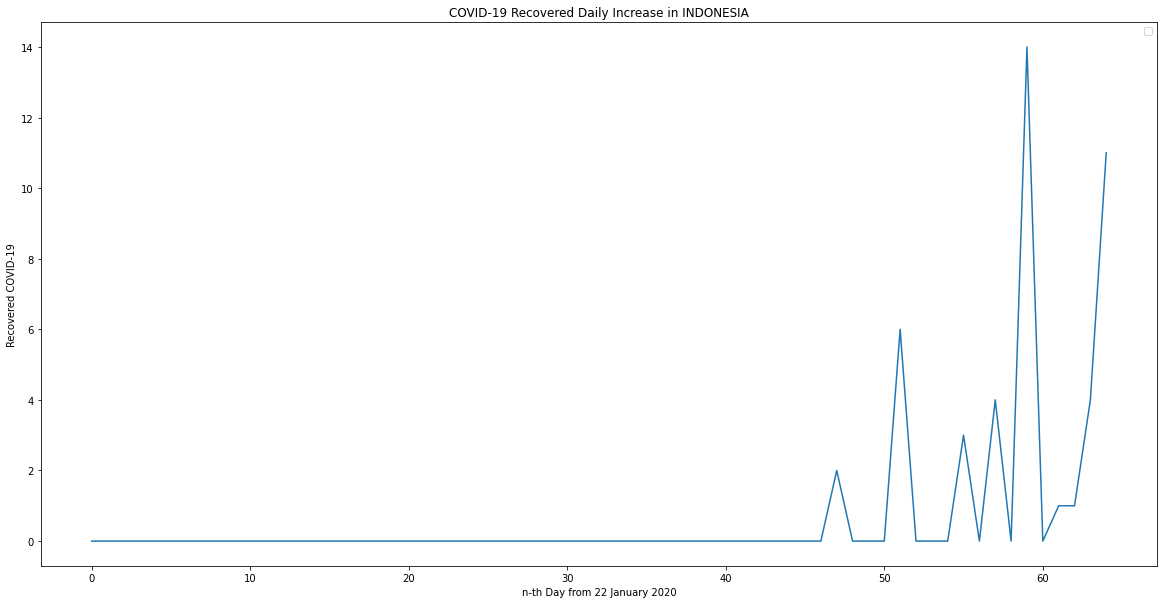

In [175]:
print(kenaikan)
plt.figure(figsize=(20,10))
plt.plot(kenaikan)
plt.legend()
plt.xlabel('n-th Day from 22 January 2020')
plt.ylabel('Recovered COVID-19')
plt.title('COVID-19 Recovered Daily Increase in INDONESIA')
plt.show()


Based on this graphic, we nkow that, the number of COVID-19 in Indonesia have a positif trend.

In [176]:
kenaikan_prediksi = predict - last_conf
print(kenaikan_prediksi)

[[10.718548]]


In [177]:
result = []
for i in range(len(IndConf)-2):
  x_input = array([IndConf[i], IndConf[i+1], IndConf[i+2]])
  x_input = x_input.reshape((1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  result.append(yhat[0][0])

np_array = np.array(result)
np_round = np.around(np_array, 0)
round_result = list(np_round)

print(round_result)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 3.0, 3.0, 8.0, 9.0, 10.0, 10.0, 11.0, 15.0, 18.0, 24.0, 28.0, 31.0, 34.0, 35.0, 41.0, 57.0]


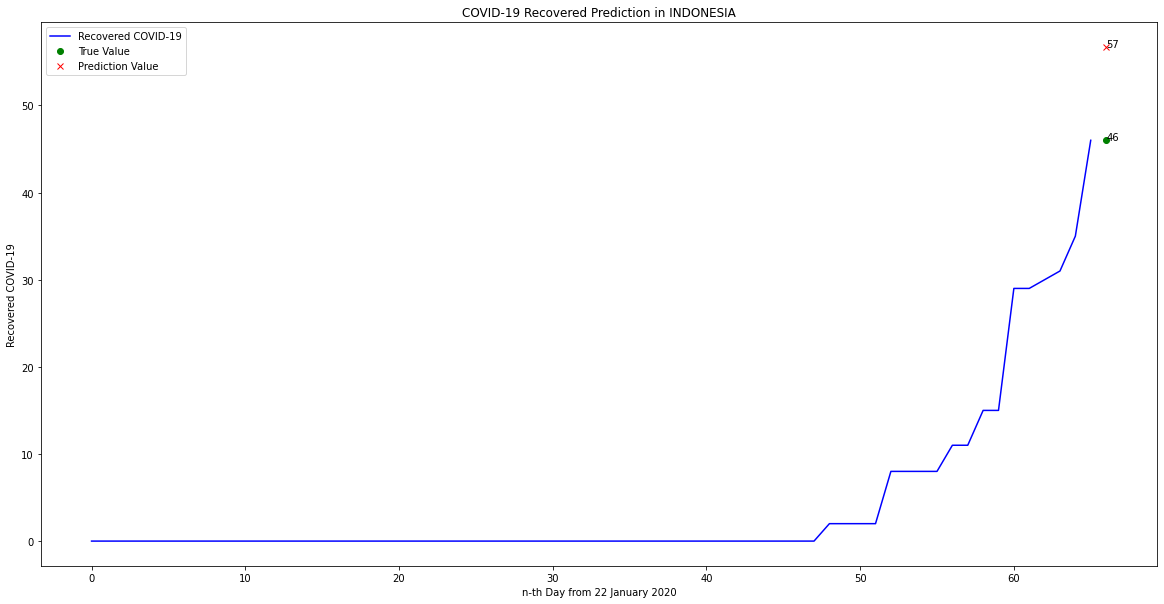

In [179]:
plt.figure(figsize=(20,10))
plt.plot(IndConf, color='b', label='Recovered COVID-19')
#plt.plot(result, color='b')
plt.plot(66,last_conf, 'go',label='True Value' )
plt.text(66,last_conf,'46')
plt.plot(66,predict, 'rx' ,label='Prediction Value')
plt.text(66,predict,'57')
plt.legend()
plt.xlabel('n-th Day from 22 January 2020')
plt.ylabel('Recovered COVID-19')
plt.title('COVID-19 Recovered Prediction in INDONESIA')
plt.show()


We have produced a prediction of the number of COVID-19 Recovered on the 66th day in Indonesia that is 57, whereas in reality the number of recovered on that day is 46. This model still has an error rate of 11 in the context of these results.